In [91]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [92]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [93]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [94]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [95]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [96]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [97]:
y_train.shape, y_test.shape

((50000,), (10000,))

In [98]:
idxes = np.random.randint(50000, size = 9)
idxes

array([ 4770,  9633,  1122, 49854, 21256,  8506, 20743, 47022,  8418])

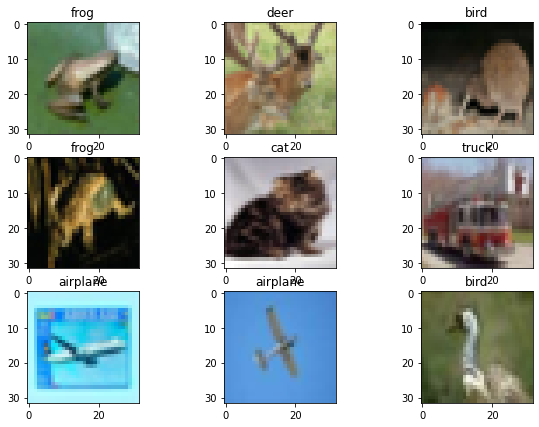

In [99]:
fig = plt.figure(figsize = (10, 7))
for i, idx in enumerate(idxes):
  ax = fig.add_subplot(3, 3, i+1)
  ax.set_title(class_name[y_train[idx]])
  ax.imshow(X_train[idx])
plt.show()

In [100]:
# 스케일링
X_train = X_train/255.
X_test = X_test/255.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 2022)

In [102]:
X_val.shape

(12500, 32, 32, 3)

In [103]:
# 원 핫 인코딩 스킵

In [104]:
def build_model():
  model = keras.Sequential([
      layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation = 'relu'),
      layers.Conv2D(32, (3,3)),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.AveragePooling2D(2,2),
      layers.Dropout(0.1),

      layers.Conv2D(64, (3,3)),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.AveragePooling2D(2,2),

      layers.Conv2D(128, (3,3)),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.AveragePooling2D(2,2),

      layers.Flatten(),
      layers.Dropout(0.1),
      layers.Dense(256),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.Dense(64),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.Dropout(0.1),
      layers.Dense(32),
      layers.BatchNormalization(),
      layers.ReLU(),
      layers.Dropout(0.2),
      layers.Dense(10, activation = 'softmax')


  ])
  return model

In [105]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 32)       

In [106]:
adam = keras.optimizers.Adam(learning_rate = 0.002)

# loss --> y_train 원 핫 인코딩 후 categorical_crossentropy 사용하면 됨

#만약 원핫 인코딩 안되어 있으면 아래처럼..
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [107]:
EPOCHS = 50
BATCH_SIZE = 512

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/50
74/74 [==============================] - 5s 38ms/step - loss: 1.7850 - acc: 0.3638 - val_loss: 2.5762 - val_acc: 0.1025
Epoch 2/50
74/74 [==============================] - 2s 32ms/step - loss: 1.3349 - acc: 0.5285 - val_loss: 3.0314 - val_acc: 0.1150
Epoch 3/50
74/74 [==============================] - 2s 31ms/step - loss: 1.1109 - acc: 0.6181 - val_loss: 3.5028 - val_acc: 0.1003
Epoch 4/50
74/74 [==============================] - 2s 31ms/step - loss: 0.9696 - acc: 0.6697 - val_loss: 3.1896 - val_acc: 0.1173
Epoch 5/50
74/74 [==============================] - 2s 32ms/step - loss: 0.8597 - acc: 0.7077 - val_loss: 2.9561 - val_acc: 0.1927
Epoch 6/50
74/74 [==============================] - 2s 32ms/step - loss: 0.7830 - acc: 0.7347 - val_loss: 2.4121 - val_acc: 0.3500
Epoch 7/50
74/74 [==============================] - 2s 32ms/step - loss: 0.7190 - acc: 0.7563 - val_loss: 2.0497 - val_acc: 0.4086
Epoch 8/50
74/74 [==============================] - 2s 32ms/step - loss: 0.6652 - a

In [115]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

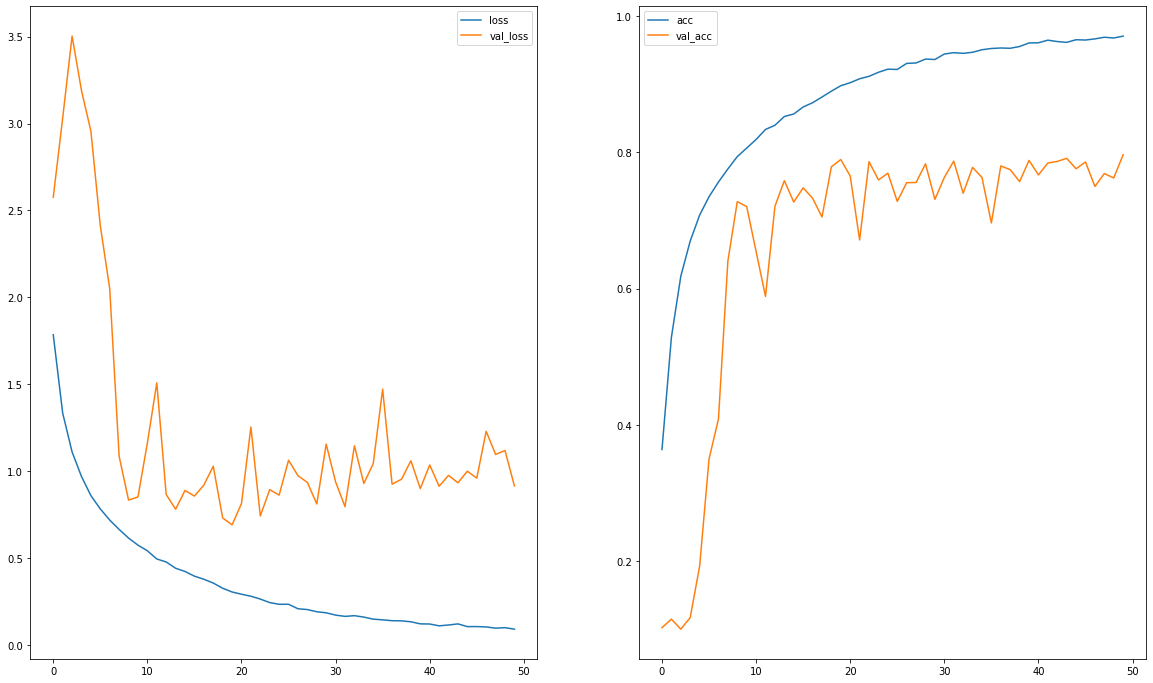

In [116]:
plot_history(history)

In [117]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9383 - acc: 0.7945


[0.9383116364479065, 0.7944999933242798]

In [118]:
y_pred = model.predict(X_test)
y_pred

array([[2.6285338e-06, 7.1757427e-06, 1.5140132e-03, ..., 4.9064714e-05,
        1.1007596e-05, 7.4067739e-06],
       [1.9224062e-04, 9.9167701e-06, 5.6587440e-11, ..., 6.1283201e-09,
        9.9979776e-01, 4.2103807e-08],
       [1.1525260e-04, 6.7139816e-05, 5.0934170e-07, ..., 1.3980828e-06,
        9.9977773e-01, 2.5721214e-05],
       ...,
       [9.8729072e-12, 4.1841482e-11, 1.1545617e-07, ..., 1.3287256e-06,
        1.8007015e-08, 3.7349547e-11],
       [2.7226296e-03, 9.3155766e-01, 2.0946669e-03, ..., 3.6220287e-03,
        1.0755481e-05, 5.1903975e-04],
       [6.6304120e-14, 2.6107805e-13, 3.0959495e-11, ..., 1.0000000e+00,
        7.6889477e-14, 1.3722046e-13]], dtype=float32)

In [119]:
y_pred = np.argmax(y_pred, axis = 1)

In [120]:
y_test.shape, y_pred.shape

((10000,), (10000,))

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7945